In [1]:
!pip install transformers
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

from imblearn.over_sampling import RandomOverSampler

In [3]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(13,13))
    labels=['anger', 'boredom', 'empty','enthusiasm','fun','hapiness','hate','love','neutral','relief','sadness','surprise','worry']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [4]:
#nltk.download('stopwords')

In [5]:
df = pd.read_csv('mbti_1.csv')

In [6]:
df.shape

(8675, 2)

In [7]:
df.isnull().sum()

type     0
posts    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [10]:
df["posts"][1:10]

1    'I'm finding the lack of me in these posts ver...
2    'Good one  _____   https://www.youtube.com/wat...
3    'Dear INTP,   I enjoyed our conversation the o...
4    'You're fired.|||That's another silly misconce...
5    '18/37 @.@|||Science  is not perfect. No scien...
6    'No, I can't draw on my own nails (haha). Thos...
7    'I tend to build up a collection of things on ...
8    I'm not sure, that's a good question. The dist...
9    'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
Name: posts, dtype: object

In [11]:
df["new_posts"] = df["posts"].apply(lambda x: x.lower())

In [12]:
from nltk.corpus import stopwords
sw_list = stopwords.words("english")
df['new_posts'] = df['new_posts'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [13]:
df

,type,posts,new_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...,'i'm finding lack posts alarming.|||sex boring...
2,INTP,'Good one _____ https://www.youtube.com/wat...,'good one _____ https://www.youtube.com/watch?...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'dear intp, enjoyed conversation day. esoteric..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'you're fired.|||that's another silly misconce...
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,'https://www.youtube.com/watch?v=t8edhb_h908||...
8671,ENFP,'So...if this thread already exists someplace ...,'so...if thread already exists someplace else ...
8672,INTP,'So many questions when i do these things. I ...,'so many questions things. would take purple p...
8673,INFP,'I am very conflicted right now when it comes ...,'i conflicted right comes wanting children. ho...


In [14]:
text_len = []
for text in df.new_posts:
    text_l = len(text.split())
    text_len.append(text_l)

In [15]:
df['text_len'] = text_len

In [16]:
df.drop(df[(df['text_len'] < 1)].index, inplace=True)

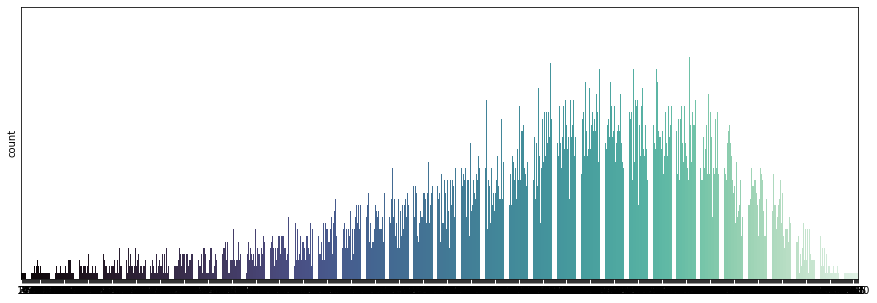

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='text_len', data=df, palette='mako')
plt.yticks([])

plt.ylabel('count')
plt.xlabel('')
plt.show()

In [18]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_lens = []

for txt in df['new_posts'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

In [ ]:
token_lens = []

for i,txt in enumerate(df['new_posts'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>200:
        print(f"INDEX: {i}, TEXT: {txt}")  